# Imports

In [37]:
%load_ext autoreload
%autoreload 2
import os ; import sys
sys.path.insert(0, os.path.abspath(os.path.join('./lib')))

import utilities
import directed_connectivity
import ignition_rebound
import cross_frequency
import network_geometry

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [45]:
ELECTRODES = ['AF3','AF4','F7','F8','F3','F4','FC5','FC6','P7','P8','T7','T8','O1','O2']
RANGES  = {'Delta':[1,4],'Theta':[4,8],'Alpha':[8,12],'BetaL':[12,16], 'BetaH':[16,25],'Gamma':[25,45]}

In [3]:
FILENAME = "data/test schumann_EPOCX_111270_2023.04.23T14.50.35.05.00.md.pm.bp.csv"
FS = 128

RECORDS = utilities.load_eeg_csv(FILENAME, electrodes=ELECTRODES)
RECORDS

Timestamp  EEG.Counter  EEG.Interpolated      EEG.AF3       EEG.F7  \
0        0.000000         21.0               0.0  4361.153809  4305.897461   
1        0.007704         22.0               0.0  4361.666504  4300.641113   
2        0.015708         23.0               0.0  4350.384766  4284.615234   
3        0.023412         24.0               0.0  4346.794922  4278.846191   
4        0.031316         25.0               0.0  4353.717773  4280.384766   
...           ...          ...               ...          ...          ...   
88850  693.752160         39.0               0.0  4296.666504  4265.000000   
88851  693.760067         40.0               0.0  4291.538574  4260.384766   
88852  693.767973         41.0               0.0  4293.717773  4270.897461   
88853  693.775880         42.0               0.0  4309.358887  4288.205078   
88854  693.783687         43.0               0.0  4323.717773  4284.487305   

            EEG.F3      EEG.FC5       EEG.T7       EEG.P7       EEG.O1  ...  \
0      4336.922852  4345.769043  4344.743652  4277.179688  4284.615234  ...   
1      4334.358887  4335.000000  4346.282227  4277.179688  4287.051270  ...   
2      4326.025879  4322.692383  4334.487305  4277.307617  4285.512695  ...   
3      4334.230957  4323.333496  4330.641113  4277.692383  4280.769043  ...   
4      4345.000000  4327.436035  4338.205078  4278.077148  4280.000000  ...   
...            ...          ...          ...          ...          ...  ...   
88850  4313.333496  4299.743652  4343.461426  4267.948730  4265.769043  ...   
88851  4302.436035  4296.025879  4341.282227  4269.358887  4255.641113  ...   
88852  4298.077148  4309.871582  4343.461426  4272.563965  4253.717773  ...   
88853  4310.384766  4323.077148  4352.051270  4280.000000  4266.922852  ...   
88854  4313.589844  4312.563965  4345.256348  4281.410156  4272.179688  ...   

       EEG.O2.BetaH.BIN  EEG.O2.Gamma  POW.EEG.O2.Gamma  EEG.O2.Gamma.BIN  \
0                     1      0.002424          0.000006                 0   
1                     0      2.579016          6.651323                 0   
2                     0     -0.612538          0.375202                 1   
3                     0     -1.132113          1.281680                 1   
4                     1      0.972215          0.945202                 0   
...                 ...           ...               ...               ...   
88850                 0      0.553583          0.306454                 0   
88851                 1     -0.853158          0.727878                 1   
88852                 1     -1.592120          2.534846                 1   
88853                 1      1.689099          2.853056                 0   
88854                 1     -0.032886          0.001082                 1   

       POW.EEG.O2.Delta.REL  POW.EEG.O2.Theta.REL  POW.EEG.O2.Alpha.REL  \
0                  0.169807              0.026432              0.738918   
1                  0.046686              0.041598              0.049372   
2                  0.076558              0.093661              0.034900   
3                  0.200288              0.232147              0.025471   
4                  0.338600              0.311681              0.000616   
...                     ...                   ...                   ...   
88850              0.033341              0.012156              0.000032   
88851              0.358001              0.084260              0.043122   
88852              0.020924              0.002822              0.006819   
88853              0.019529              0.001202              0.007590   
88854              0.636267              0.010101              0.172670   

       POW.EEG.O2.BetaL.REL  POW.EEG.O2.BetaH.REL  POW.EEG.O2.Gamma.REL  
0                  0.050399              0.014441              0.000004  
1                  0.168686              0.577961              0.115696  
2                  0.294788              0.496205              0.003887  


# PSD & Relative Band Power

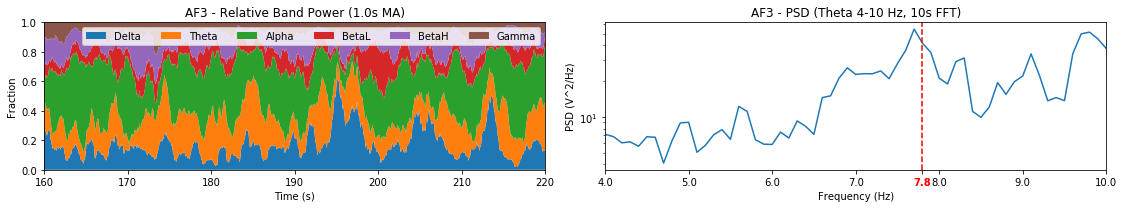

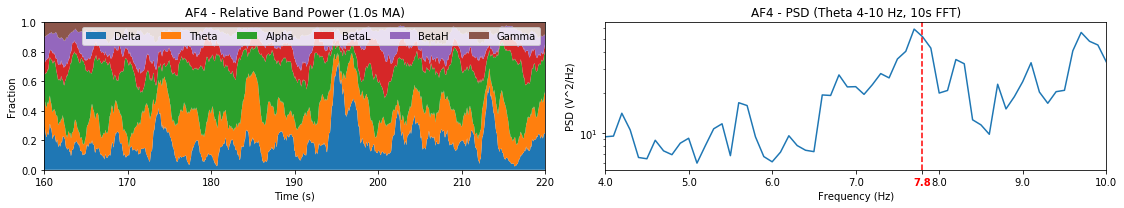

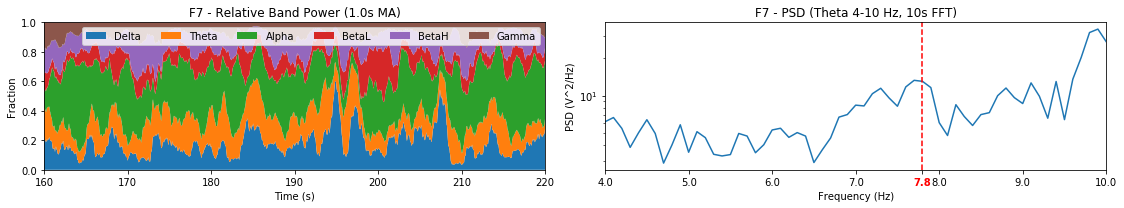

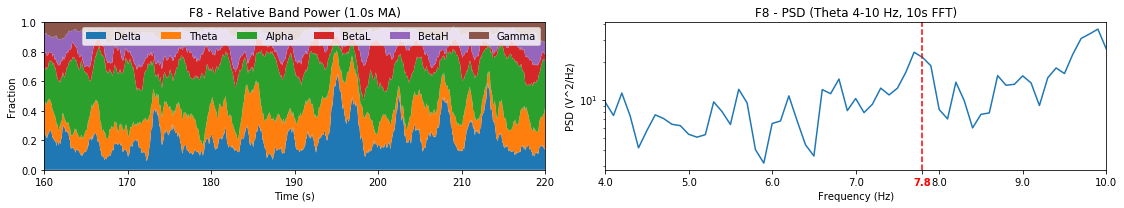

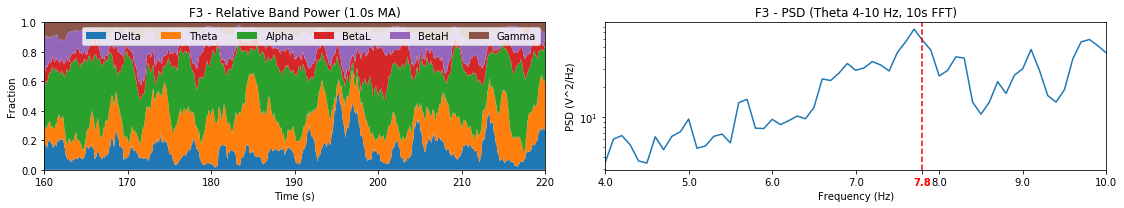

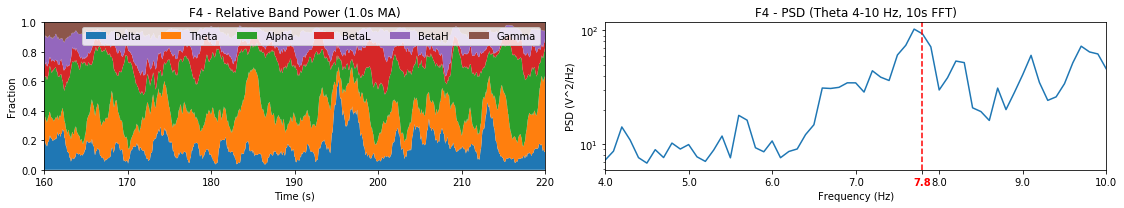

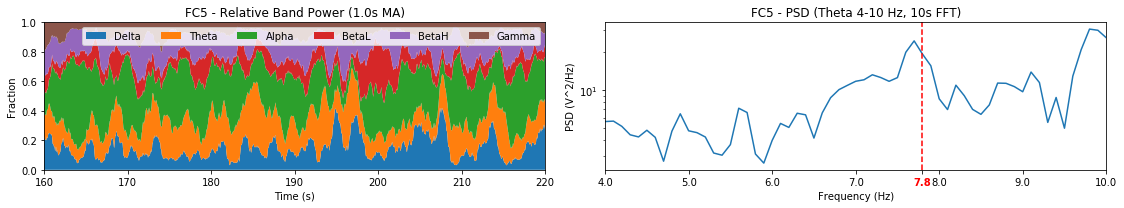

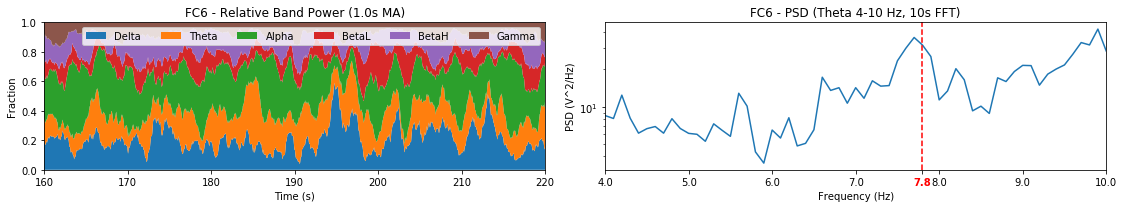

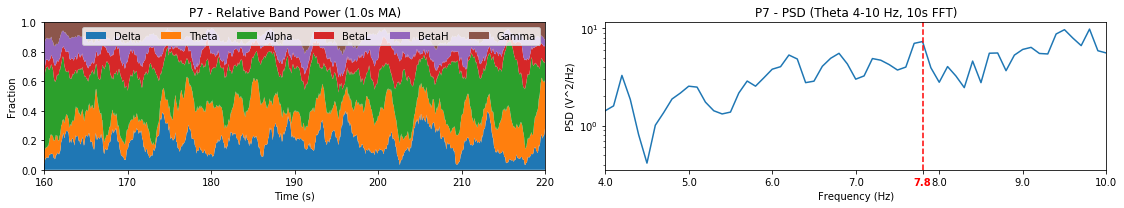

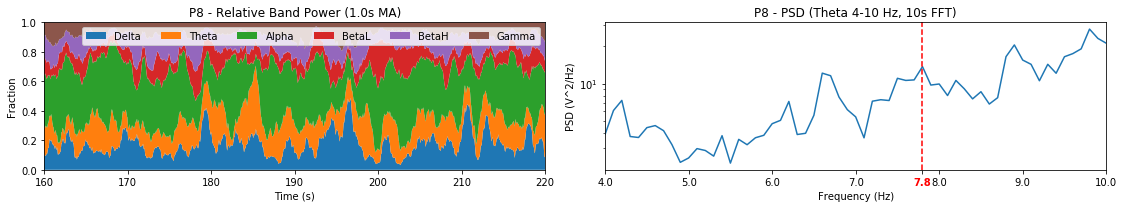

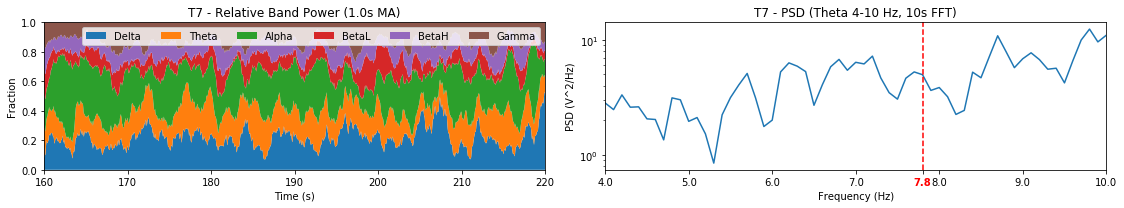

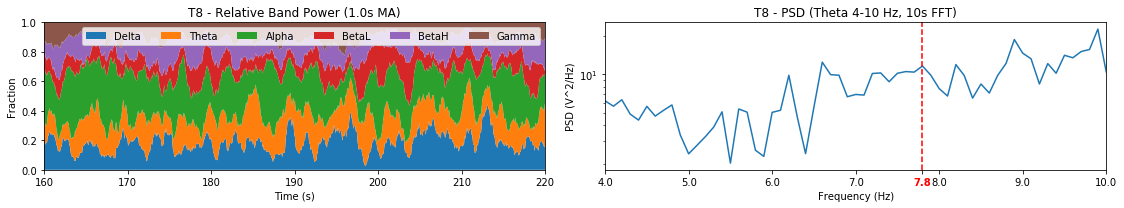

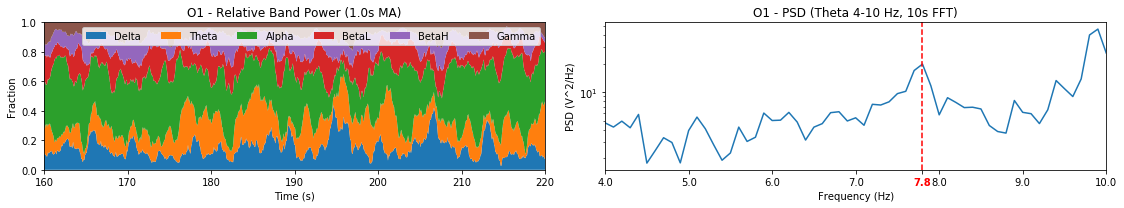

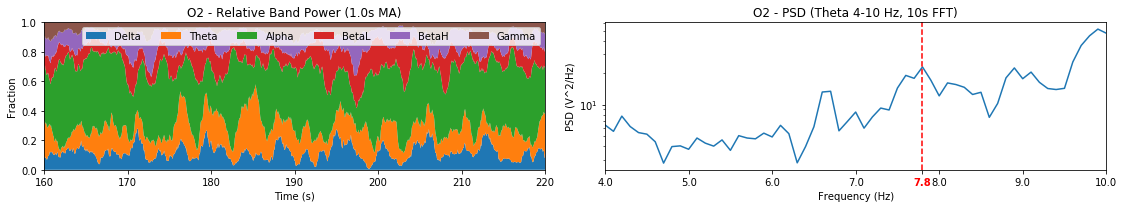

In [4]:
utilities.plot_stacked_relpower_timeseries(
    RECORDS,ELECTRODES,
    start_sec=160, 
    end_sec=220, 
    smooth_sec=1.0, 
    psd_fft_win=10
)

# Individual Alpha Frequency (IAF)

In [5]:
# --- Example usage (uncomment and adjust your variables) ---
iaf_results, iaf_summary = utilities.compute_iaf(
    df=RECORDS,
    electrodes=ELECTRODES,
    fs=FS,
    start_sec=180,
    end_sec=200,
    alpha_band=(7.0, 13.0),
    roi=("O1","O2","F3","F4","P7","P8"),
    psd_fft_win=10.0,
    psd_overlap=0.1,
    smooth_hz=0.1,
)
display(iaf_results)
print(iaf_summary)

electrode  PAF_Hz    CoG_Hz  alpha_power
0        AF3     7.7  8.750627   166.512932
1        AF4     7.8  8.686384   182.611381
2         F7     7.3  9.134896    83.852915
3         F8     7.8  9.020431   101.246403
4         F3     7.7  8.511908   209.388428
5         F4     7.8  8.450644   292.456748
6        FC5     7.7  8.854006    95.881375
7        FC6     7.7  8.744505   137.284892
8         P7     7.7  9.026772    23.605550
9         P8     7.8  9.327374    75.485869
10        T7    10.0  9.429018    37.647879
11        T8     7.8  9.103812    61.849727
12        O1     7.7  9.429724    67.181830
13        O2     7.8  9.596313   135.338885

{'ROI_electrodes_used': ['F3', 'F4', 'P7', 'P8', 'O1', 'O2'], 'PAF_median_Hz': 7.75, 'PAF_mean_Hz': 7.75, 'CoG_median_Hz': 9.177073078835393, 'CoG_mean_Hz': 9.057122586086253}


# Animate Theta/Alpha PSD

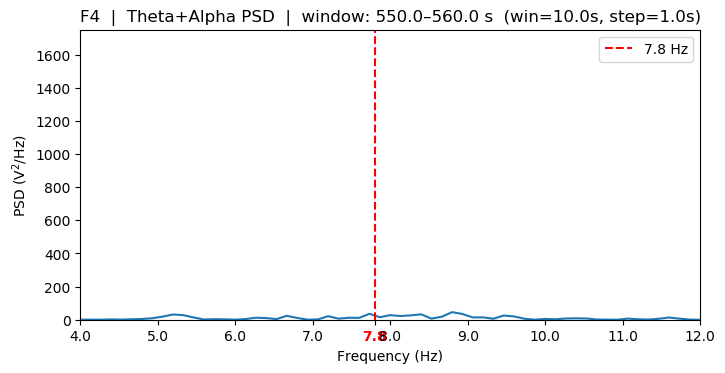

In [6]:
# --- Example usage (per electrode) ---
for electrode in ['F4']:
    anim = utilities.animate_theta_alpha_psd(
        df=RECORDS,
        electrode=electrode,
        fs=FS,
        start_sec=550,
        end_sec=580,
        win_sec=10,
        step_sec=1,
        psd_fft_win=7.5,
        psd_overlap=0.1,
        band=(4,12),
        dpi=100,
        show_legend=True,
        save_path=electrode+".gif"
    )
from IPython.display import HTML
HTML(anim.to_jshtml())

# Global Field Potential (GFP) - Theta/Alpha

Empty DataFrame
Columns: []
Index: []

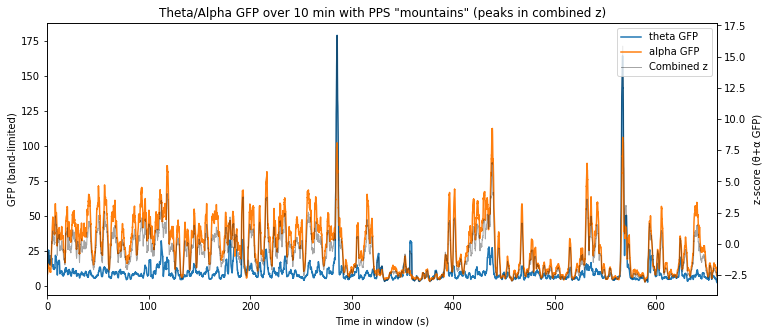

In [7]:
# Example usage (after RECORDS/ELECTRODES/FS are defined):
out = utilities.plot_pps_mountains(RECORDS, ELECTRODES, FS, start_sec=0, duration_sec=660,
                         bands=("theta","alpha"), smooth_sec=2.0,
                         baseline_first_sec=60, z_thresh=2.5,
                         prominence=0.5, min_width_sec=5, min_distance_sec=10,
                         use_existing_cols=True)
display(out['peaks'])

# (1/f) Aperiodic Slope

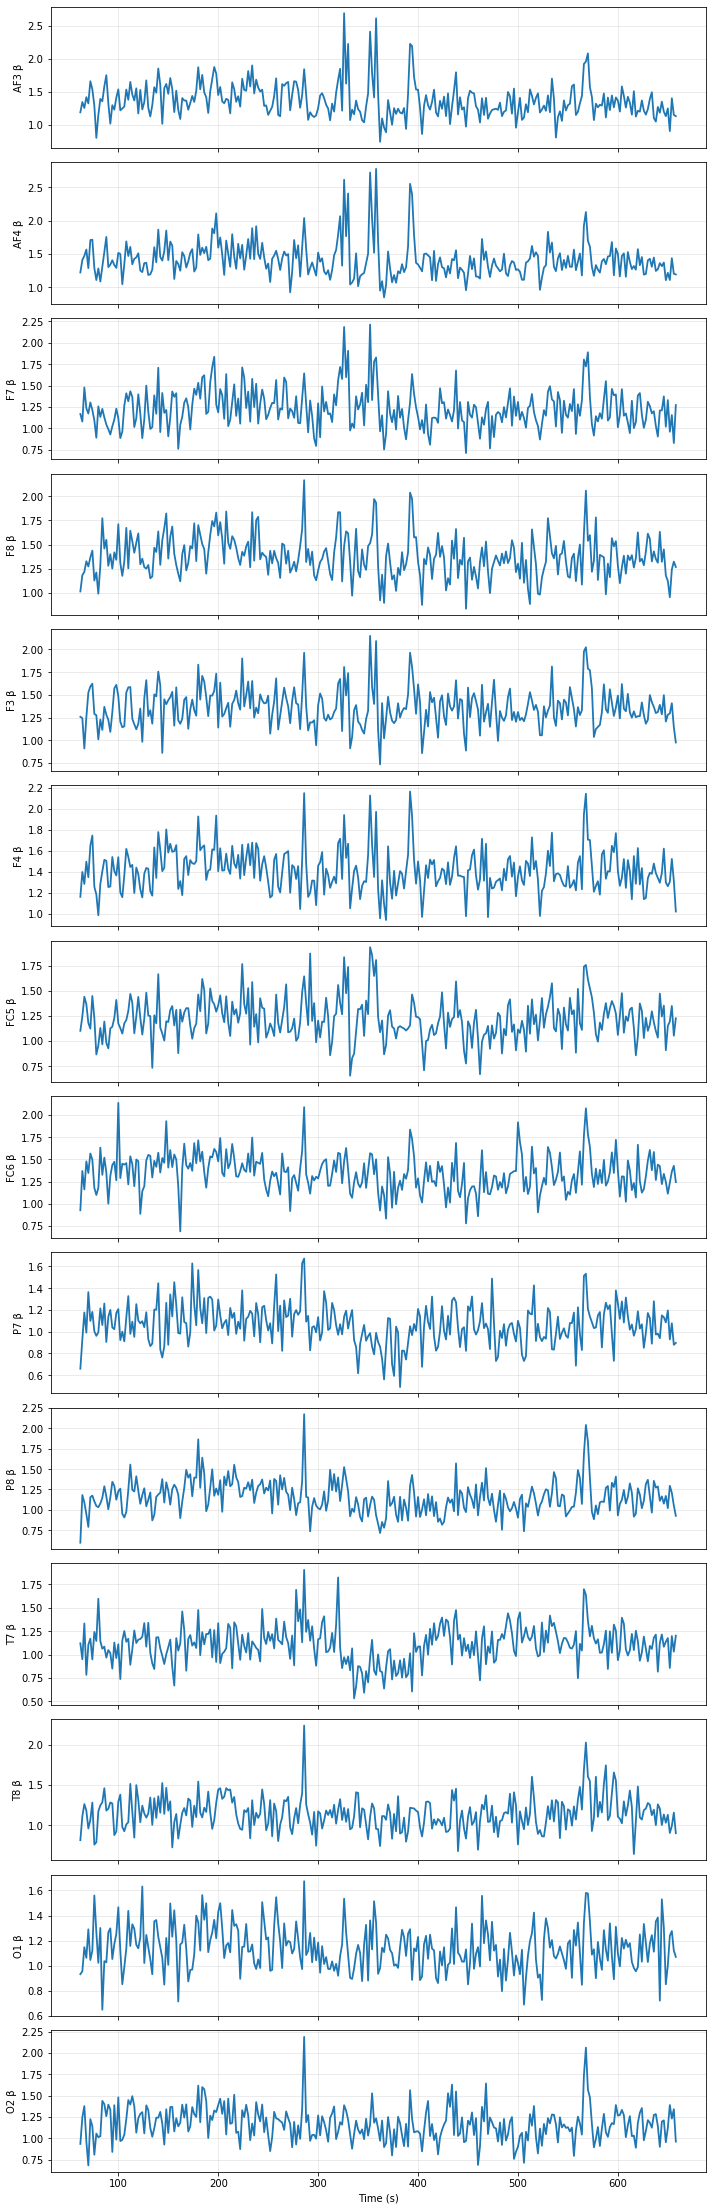

(<Figure size 720x2217.6 with 14 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c3f34f550>,
       dtype=object))

In [8]:
utilities.plot_aperiodic_slope_timeseries(
    df=RECORDS,
    electrodes=ELECTRODES,
    fs=FS,
    start_sec=60,
    end_sec=660,
    win_sec=4.0,
    step_sec=2.0,
    fmin=1.0,
    fmax=45.0,
    exclude_bands_for_fit=((8,13),(18,25)),
    ylim=None,             # or e.g. (0.6, 2.0)
    figsize=(10, 2.2)      # height per subplot; total height = 2.2 * n_electrodes
)

# EEG Band Timelines by Electrode

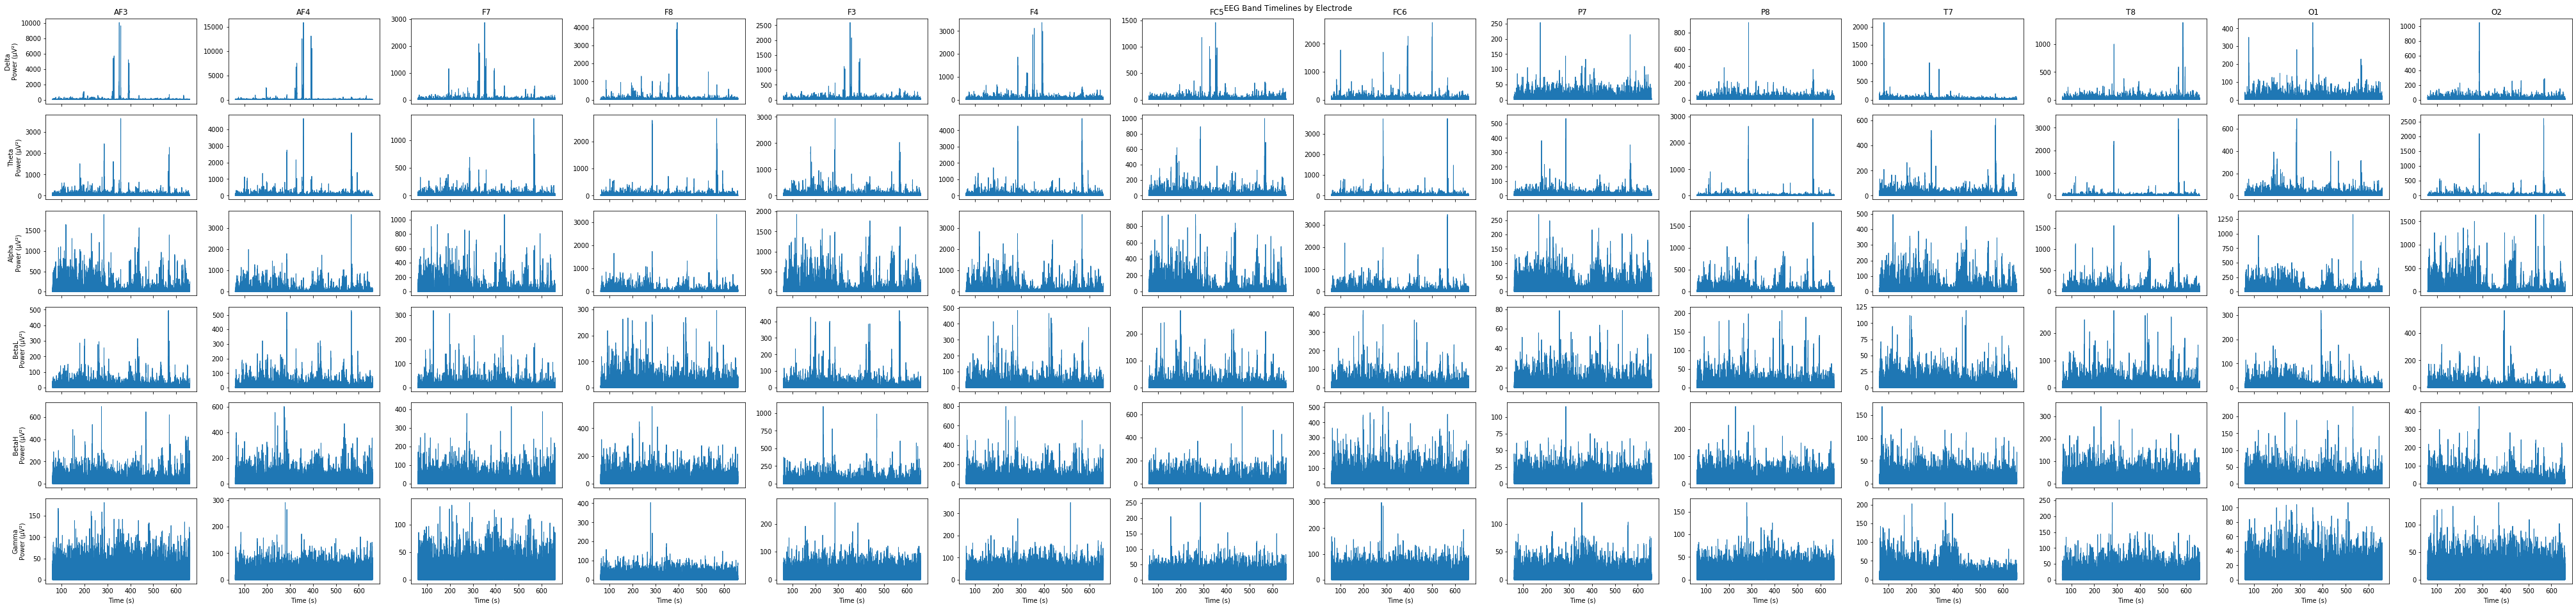

In [25]:
utilities.plot_eeg_timeline_grid(
    df=RECORDS,
    electrodes=ELECTRODES,
    ranges=RANGES,
    start_time=60,
    end_time=660
)

# Source-space + Directed Connectivity (F4/DLPFC → sensory)

In [18]:
windows = [(160,200)]

# SOURCE space (main analysis)
df_sensor = directed_connectivity.run_topdown_ignition_pipeline(
    records=RECORDS, electrodes=ELECTRODES, fs=FS,
    raw=None, windows=windows, mode='sensor'
)
print(df_sensor.head())

Creating RawArray with float64 data, n_channels=14, n_times=88855
    Range : 0 ... 88854 =      0.000 ...   694.172 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
       window    pair   band  dpli  granger_F     granger_p
0  (160, 200)  F4->O1  theta   NaN  11.983381  7.419664e-21
1  (160, 200)  F4->O1  alpha   NaN  12.137291  3.644322e-21
2  (160, 200)  F4->O1   beta   NaN  11.817818  1.593220e-20
3  (160, 200)  F4->O2  theta   NaN   5.454448  4.051633e-08
4  (160, 200)  F4->O2  alpha   NaN   5.924370  5.373500e-09


# Ignition vs Rebound Power Plots

In [ ]:
# Single map
ignition_rebound.plot_topomap_from_power(RECORDS, band='rel_Alpha', montage='standard_1020')

# Grid of maps (auto-picks rel bands if present)
plot_topomap_grid_from_power(RECORDS, bands=['rel_Delta','rel_Theta','rel_Alpha','rel_BetaL','rel_BetaH','rel_Gamma'],
                             montage='standard_1005', cols=6, normalize=True)

# Cross Frequency - PAC, Bicoherence, & Waveform Shape

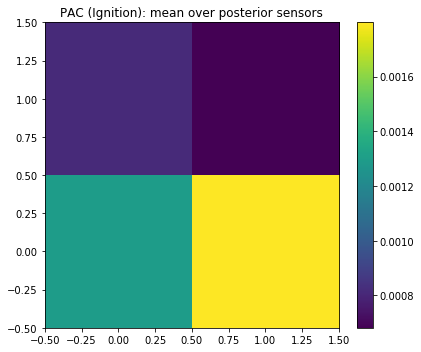

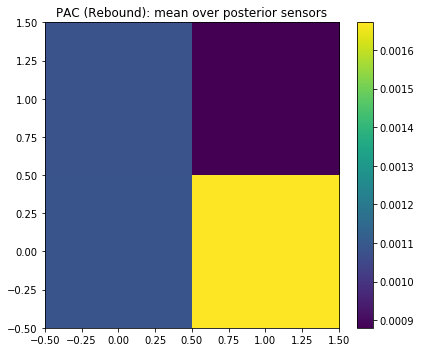

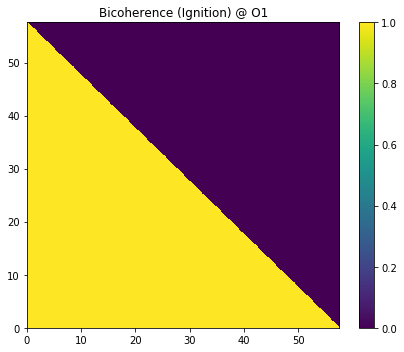

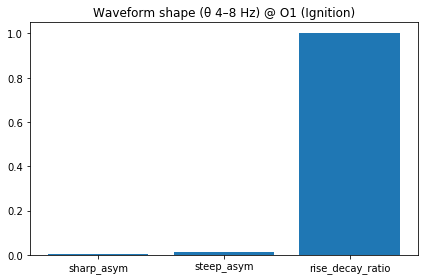

θ→γ PAC mean = 0.002; Bicoherence 95th pct = 1.000; Shape: sharp=0.003, steep=0.011, rise/decay=1.000


In [36]:
windows_ign = [(12.0, 17.0), (33.0, 38.0)]
windows_reb = [(18.0, 23.0), (39.0, 44.0)]
res = cross_frequency.run_crossfreq_suite_records(
    RECORDS,
    ignition_windows=windows_ign,
    rebound_windows=windows_reb,
    sensor_phase_ch='F4',
    sensor_amp_chs=('O1','O2','P7','P8','T7','T8'),
    phase_bands=[(4,8),(8,13)],
    amp_bands=[(13,30),(30,80)],   # auto-sanitized if too high for fs
    method='mi',
    n_sur=0
)
print(res['verdict_notes'])

# State Space Manifold Embedding

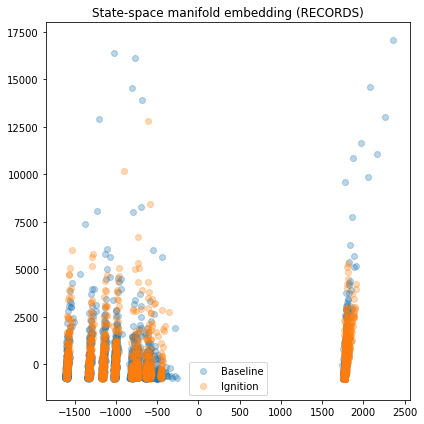

===== EEG Session Report (RECORDS) =====
Ignition entropy mean: 5.259172617420115
Ignition mincut mean: 0.0
Baseline entropy: 5.088045031773989
Baseline mincut: 0.0
Ignition eigvals avg: [-4.5640759111762655e-15, 1.437854602520896e-14, 1.6873909989148428e-14, 0.042751647865686575, 0.8670869417766701, 21.589597827032833, 22.54010912894569, 23.30039975849062, 23.43259201439954, 23.940008771530938]
Baseline eigvals: [2.0902938324043924e-15, 4.482464922236276e-15, 1.217925943966725e-14, 0.004249843103608687, 0.047337824246037274, 4.693649216602792, 5.095090967590627, 5.4122244305295, 5.416101190312096, 5.453561511986234]
Ignition embedding: (2562, 3)
Baseline embedding: (5000, 3)


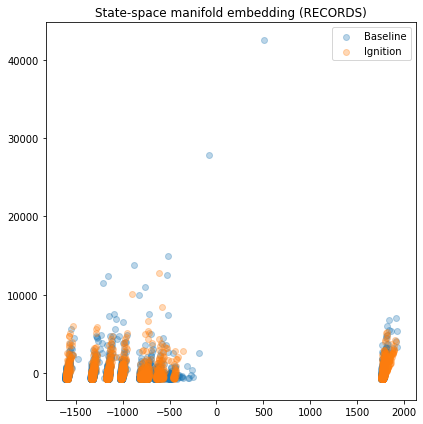

In [42]:
out = network_geometry.run_full_session_with_bands_and_exports(
    RECORDS,
    ignition_windows=[(180, 200)],
#     rebound_windows=[(14.0, 18.0)],
    electrodes=None,
    embed_method='umap',
    export_dir='session_exports',
    base_name='demo',
)

network_geometry.animate_embedding_over_time_records(
    RECORDS,
    window_sec=2.0,
    step_sec=0.5,           # smaller step → many frames
    make_gif=True,
    out_dir="embedding_frames",
    gif_name="demo.gif",
    gif_duration_s=0.12     # ~8 fps
)

# Multi-Band Geometry


=== Multi-band Geometry Summary ===
    band  f_low  f_high  ign_entropy_mean  ign_mincut_mean  base_entropy  \
0  delta    1.0     4.0          2.509358         1.773901      2.438945   
1  theta    4.0     8.0          2.524715         1.101508      2.500334   
2  alpha    8.0    13.0          2.499291         1.626528      2.529305   
3   beta   13.0    30.0          2.533472         0.635391      2.514059   
4  gamma   30.0    45.0          2.502583         0.481268      2.543398   

   base_mincut  
0     0.586782  
1     0.436370  
2     1.908000  
3     0.383051  
4     0.544550  


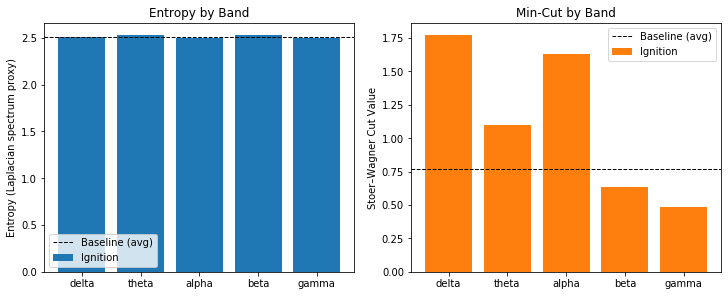

Saved multi-band summary to multi_band_summary.csv


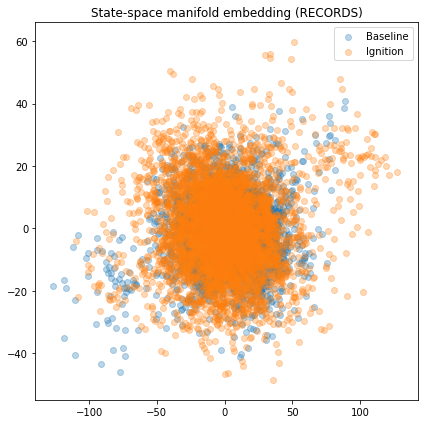

===== EEG Session Report (RECORDS) =====
Ignition entropy mean: 0.5470262407723739
Ignition mincut mean: 0.31571129272464993
Baseline entropy: 0.5930110082653832
Baseline mincut: 0.3797938921372547
Rebound entropy mean: 0.5975825261350951
Rebound mincut mean: 0.5407258939750608
Ignition eigvals avg: [-3.940532795898566e-16, 0.46514710544062515, 1.5015462024506134]
Baseline eigvals: [1.7783252151621384e-16, 0.46463642040965536, 1.1944173784943801]
Ignition embedding: (5000, 3)
Baseline embedding: (3842, 3)


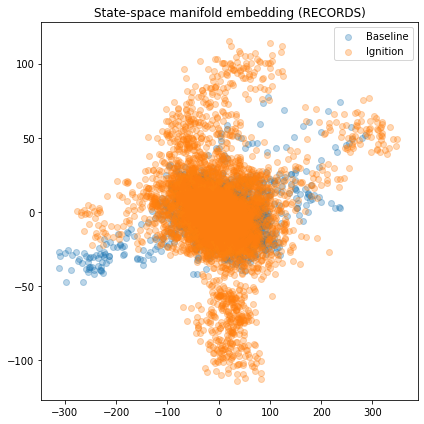

===== EEG Session Report (RECORDS) =====
Ignition entropy mean: 2.499291116357922
Ignition mincut mean: 1.6265282169257609
Baseline entropy: 2.5293045607123306
Baseline mincut: 1.9080004384027127
Rebound entropy mean: 2.5020435713481937
Rebound mincut mean: 2.0391952241181386
Ignition eigvals avg: [2.8171909249863347e-15, 1.5798026527221811, 2.0924786874802384, 2.723365573502687, 3.4245951028041723, 3.6811395040289487, 3.808392388038569, 4.014044858934263, 4.160407072525604, 4.5321192831992345]
Baseline eigvals: [7.763040020926718e-16, 1.8709181773194403, 2.2071282841744924, 2.9894046098464275, 3.3432200745450817, 3.3940584580496607, 3.423185422088089, 3.4771137011718456, 3.5093448596668364, 3.7042496711892547]
Ignition embedding: (5000, 3)
Baseline embedding: (3842, 3)


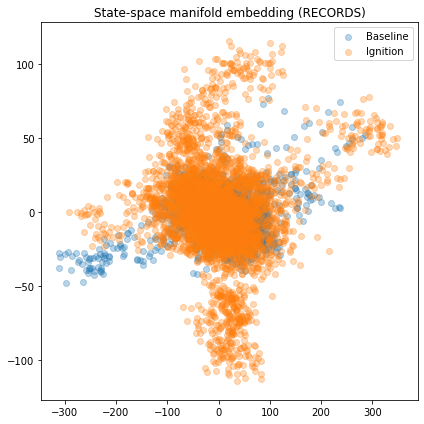

Exports: {'report_csv': 'session_exports/session_mb_report.csv', 'report_json': 'session_exports/session_mb_report.json', 'bands_csv': 'session_exports/session_mb_bands.csv', 'embedding_png': 'session_exports/session_mb_embedding.png'}


In [49]:
# --- Multi-Band Analysis: Ready-to-Run (fs=128 enforced via infer_fs_from_records) ---

# 0) Prereqs: ensure your RECORDS DataFrame exists with columns like
#    ['Timestamp', 'EEG.F4', 'EEG.O1', 'EEG.O2', ...]
#    and the fs=128 override is already in scope via your pipeline code.

# 1) Define your analysis windows (in seconds) — tweak to your session
IGNITION_WINDOWS = [(180.0, 220)]      # example: 2:00–2:30
REBOUND_WINDOWS  = [(300.0, 330.0)]      # example: 5:00–5:30

# 2) (Optional) Specify electrodes, else the code will auto-discover EEG.* columns
# ELECTRODES = ['F4', 'O1', 'O2']

# 3) Run multi-band network geometry across canonical bands
#    Produces a tidy DataFrame with per-band metrics (entropy/min-cut + baselines)
mb_df = network_geometry.run_multi_band_geometry_records(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
#     rebound_windows=REBOUND_WINDOWS,
    electrodes=ELECTRODES,
)

print("\n=== Multi-band Geometry Summary ===")
print(mb_df)

# 4) Compare ignition vs baseline by band in a quick plot (optional)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
axs[0].bar(mb_df['band'], mb_df['ign_entropy_mean'], label='Ignition')
axs[0].axhline(y=mb_df['base_entropy'].mean(), color='k', linestyle='--', lw=1, label='Baseline (avg)')
axs[0].set_title('Entropy by Band')
axs[0].set_ylabel('Entropy (Laplacian spectrum proxy)')
axs[0].legend()

axs[1].bar(mb_df['band'], mb_df['ign_mincut_mean'], label='Ignition', color='tab:orange')
axs[1].axhline(y=mb_df['base_mincut'].mean(), color='k', linestyle='--', lw=1, label='Baseline (avg)')
axs[1].set_title('Min-Cut by Band')
axs[1].set_ylabel('Stoer–Wagner Cut Value')
axs[1].legend()
plt.show()

# 5) Save the table for your records
mb_csv_path = 'multi_band_summary.csv'
mb_df.to_csv(mb_csv_path, index=False)
print(f"Saved multi-band summary to {mb_csv_path}")

# 6) (Optional) Drill into a single band with full session report for context — e.g., alpha (8–13 Hz)
alpha_report = network_geometry.session_report_records(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
    rebound_windows=REBOUND_WINDOWS,
    fband=(8, 13),
    electrodes=["EEG.F4",'EEG.O2', "EEG.O1"],
    embed_method='umap',
)

# 7) (Optional) End-to-end export including multi-band CSV + embedding PNG
full = network_geometry.run_full_session_with_bands_and_exports(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
    rebound_windows=REBOUND_WINDOWS,
    electrodes=ELECTRODES,
    embed_method='umap',
    export_dir='session_exports',
    base_name='session_mb',
)
print("Exports:", {k: v for k, v in full.items() if isinstance(v, str)})